In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
wine=pd.read_csv("wine_data.csv",sep='\t',header=0)
wine=wine.sample(frac=1)

Text(0.5,0,u'Quality')

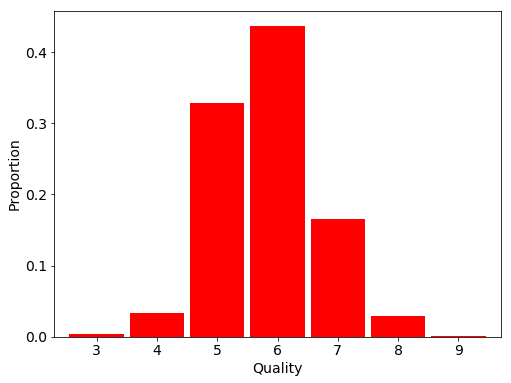

In [13]:
plt.figure(figsize(8,6))
stat=wine.groupby("quality")["quality"].agg(lambda x:float(len(x))/wine.shape[0])
stat.plot(kind="bar",fontsize=14,width=0.9,color="red")
plt.xticks(rotation=0)
plt.ylabel("Proportion",fontsize=14)
plt.xlabel("Quality",fontsize=14)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(wine.ix[:, wine.columns != 'quality'], wine['quality'], test_size=0.25, 
                                                   stratify=wine[['Type', 'quality']] )

IndexError: positional indexers are out-of-bounds

In [27]:
X_train["Type"]=X_train["Type"].apply(lambda x:-1 if x=="red" else 1)
X_test["Type"]=X_test["Type"].apply(lambda x:-1 if x=="red" else 1 )

In [29]:
np.mean(y_train)

5.821223316912972

In [30]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_train),y_train))

0.87255234821520122

In [31]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_test),y_test))

0.87510976938810503

In [32]:
wine.groupby("Type")["Type"].count()

Type
red      1599
white    4898
Name: Type, dtype: int64

Text(0.5,0,u'Quality')

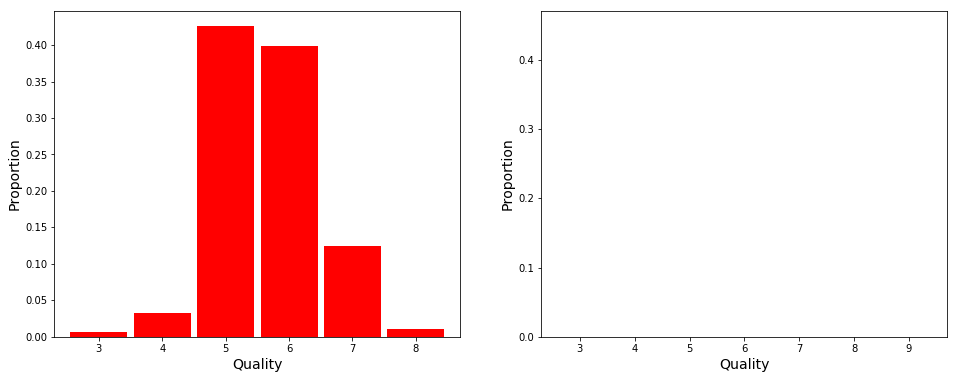

In [34]:
plt.figure(figsize(16,6))
plt.subplot(121)
stat_red = wine[wine['Type'] == 'red'].groupby('quality')['quality'].agg(lambda x: float(len(x))/wine[wine['Type'] == 'red'].shape[0])
stat_red.plot(kind='bar', color='r', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

plt.subplot(122)
stat_white = wine[wine['Type'] == 'white'].groupby('quality')['quality'].agg(lambda x: float(len(x))/wine[wine['Type'] == 'white'].shape[0])
stat_white.plot(color='w', kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

In [35]:
tmeans = sm.CompareMeans(sm.DescrStatsW(wine[wine['Type'] == 'white']['quality']), 
                         sm.DescrStatsW(wine[wine['Type'] == 'red']['quality']))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

4.8880690442018232e-22

In [36]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.19293009404017963, 0.29084357932805199)

In [37]:
regressor = LinearRegression()
regressor.fit(X_train['Type'].reshape(-1,1), y_train)

C:\Users\dim\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_train_predictions = regressor.predict(X_train['Type'].reshape(-1,1))

C:\Users\dim\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [39]:
y_test_predictions = regressor.predict(X_test['Type'].reshape(-1,1))

C:\Users\dim\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [40]:
sqrt(mean_squared_error(y_train_predictions, y_train))

0.86612238100732164

In [41]:
sqrt(mean_squared_error(y_test_predictions, y_test))

0.869448360907213

Text(0,0.5,u'Estimated quality')

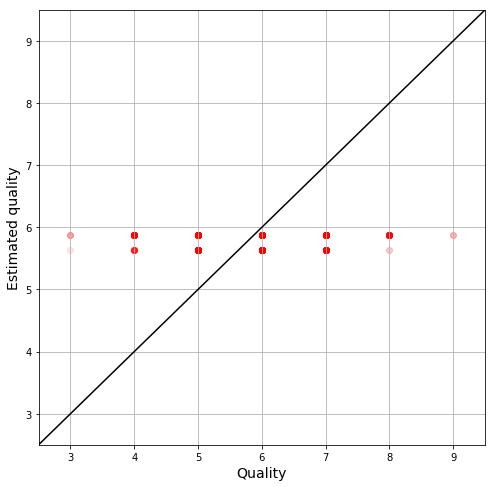

In [42]:
pyplot.figure(figsize(8,8))
pyplot.scatter(y_test, y_test_predictions, color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

In [43]:
wine.head()

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
4628,white,7.1,0.47,0.29,14.8,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8
4582,white,6.0,0.26,0.32,3.8,0.029,48.0,180.0,0.99011,3.15,0.34,12.0,6
2454,white,7.4,0.20,0.35,2.1,0.038,30.0,116.0,0.99490,3.49,0.77,10.3,7
5509,white,7.1,0.37,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27,13.6,6
1143,red,7.0,0.22,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,6


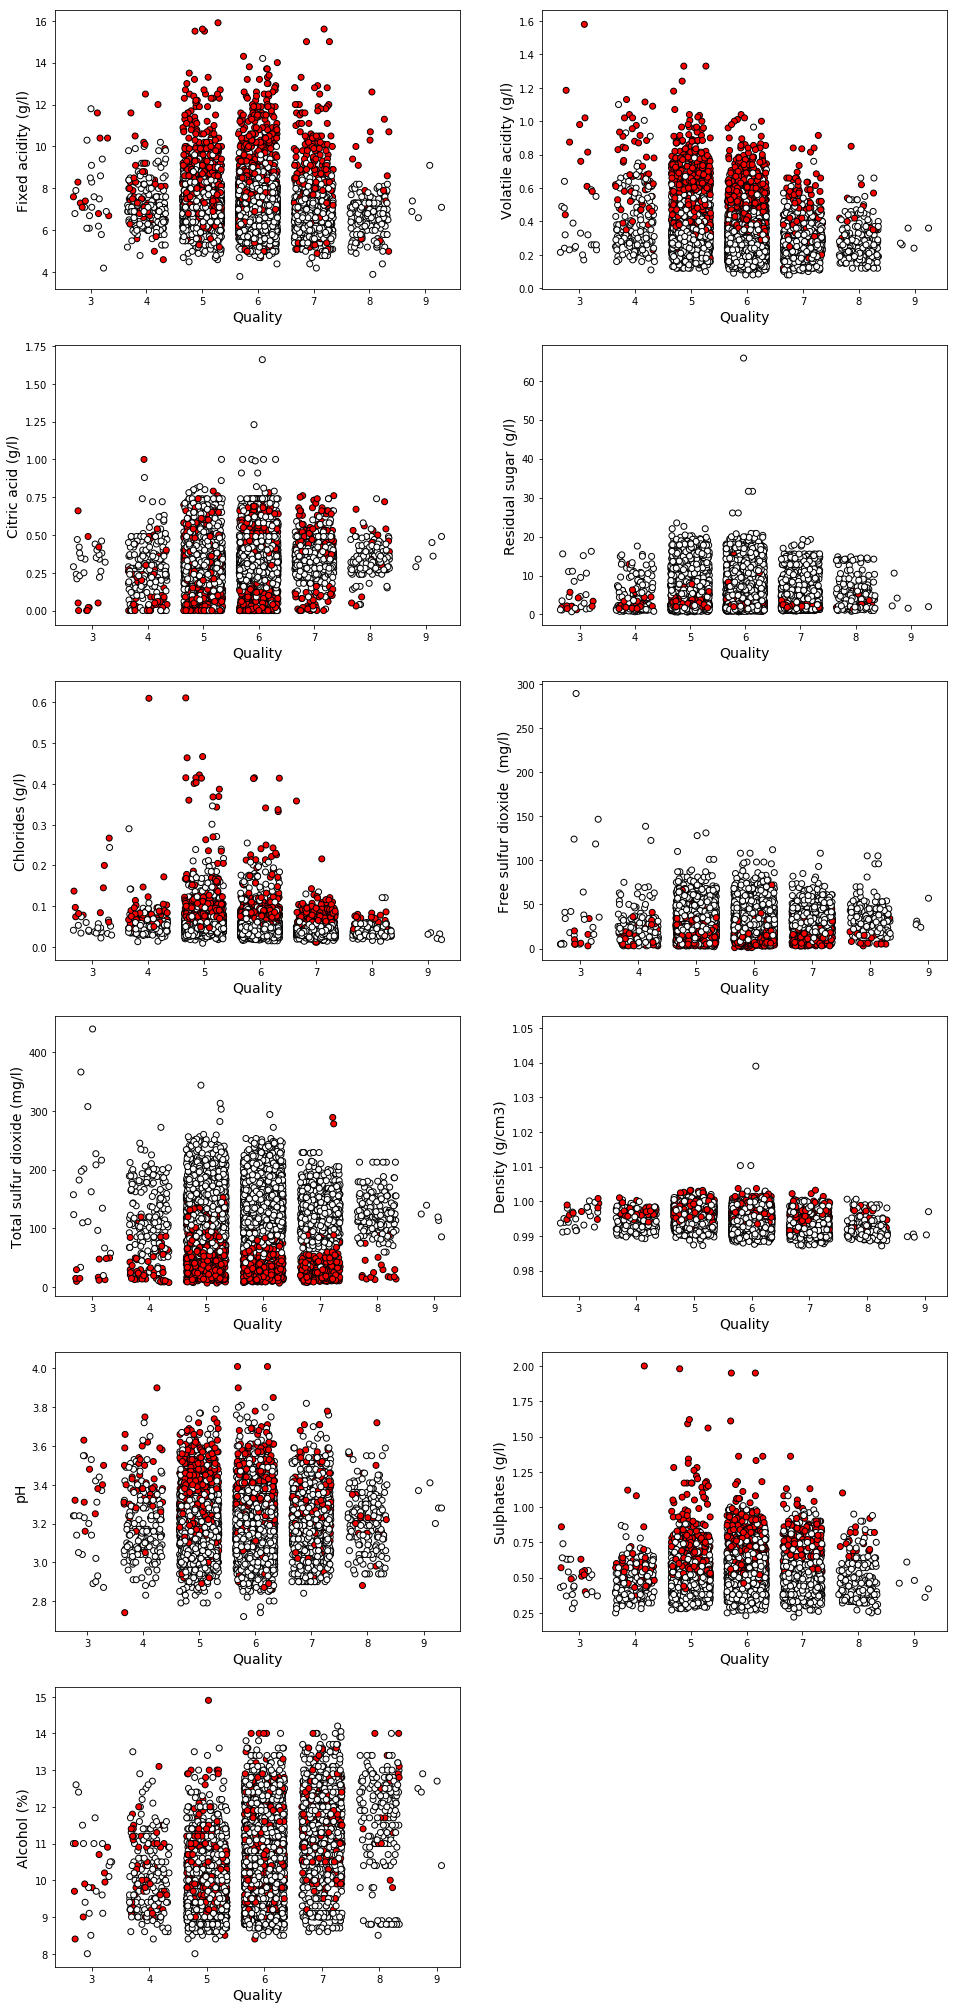

In [44]:
def jitter(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))

pyplot.figure(figsize(16, 36))
for i in range (1, 12):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(jitter(wine['quality']), wine.ix[:, i], color=wine["Type"], edgecolors="black")
    pyplot.xlabel('Quality', fontsize=14)
    pyplot.ylabel(str(wine.columns[i]), fontsize=14)

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.73307133139009528

In [47]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.73128007748186452

Text(0,0.5,u'Estimated quality')

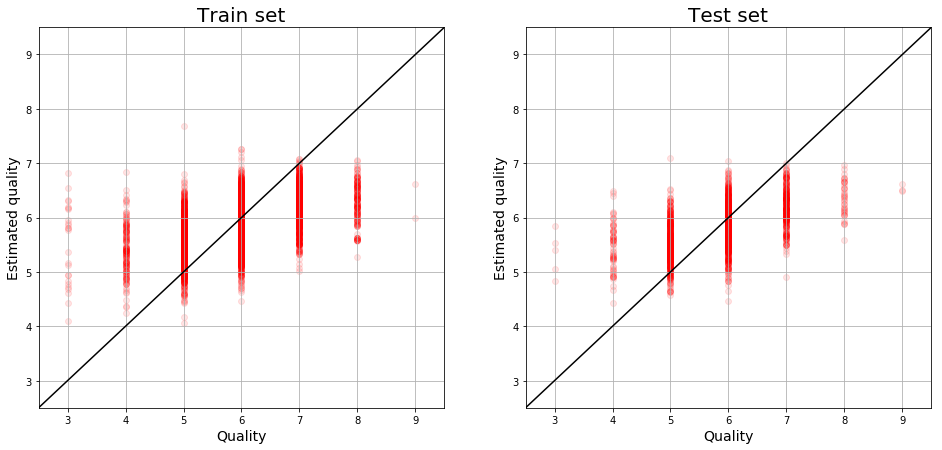

In [48]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [49]:
lm.score(X_test, y_test)

0.30158134494657274

In [50]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)

In [51]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.35130034953902611

In [53]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.61939181366539431

Text(0,0.5,u'Estimated quality')

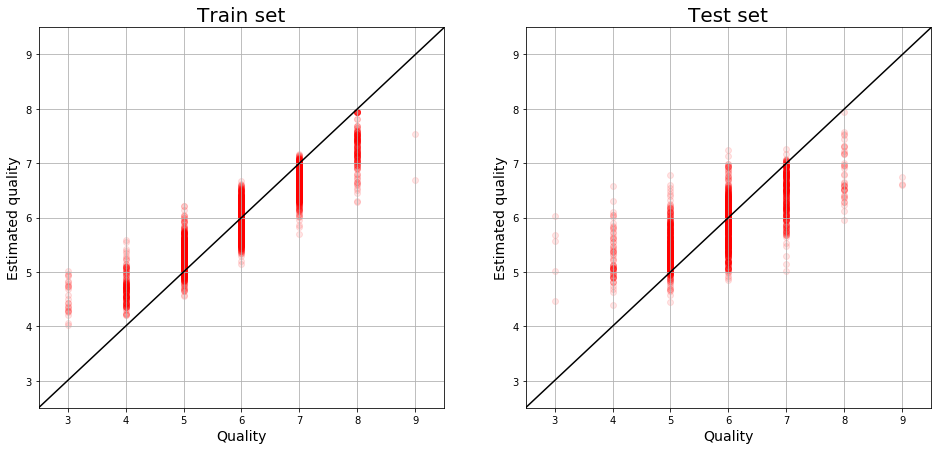

In [54]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [55]:
rf.score(X_test, y_test)

0.49895207334655639

Text(0.5,0,u'Difference of absolute errors')

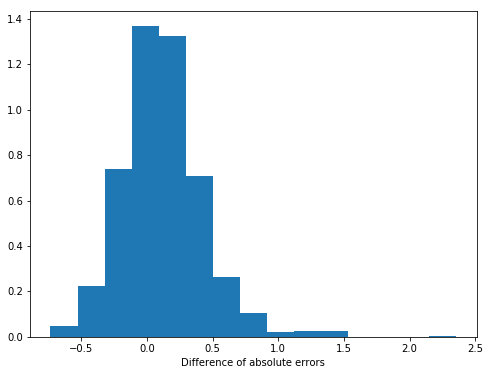

In [56]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, normed=True)
plt.xlabel('Difference of absolute errors')

In [57]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

2.8854476845981225e-14

In [58]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.086744475144251321, 0.14666098628873925)

In [59]:
importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
11,Alcohol (%),0.276307
2,Volatile acidity (g/l),0.139005
6,Free sulfur dioxide (mg/l),0.089567
10,Sulphates (g/l),0.072924
7,Total sulfur dioxide (mg/l),0.068327
4,Residual sugar (g/l),0.067128
9,pH,0.061780
5,Chlorides (g/l),0.058981
3,Citric acid (g/l),0.056358
8,Density (g/cm3),0.056337
